# **Import Library yang dibutuhkan**

In [ ]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_GeForceNOW_1.csv")
df.head()

,userName,score,at,content
0,Fadli Saguna,1,2024-05-05 02:17:10,"Udah langganan tapi gamenya harus beli lagi, j..."
1,Partiyem “JSoull”,1,2024-05-04 08:16:07,Kecewa Berat. Tidak Gratis
2,Septyan,1,2024-05-03 15:59:00,"Mau antri disuru liat iklan dulu, tapi sayangn..."
3,Raa,5,2024-05-03 04:09:57,"Keren bisa main genshin di grafik hd, tapi sar..."
4,Kelvin,1,2024-05-03 03:34:08,"Kenapa update nya jadi ada iklan begini, yang ..."


In [ ]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,"Udah langganan tapi gamenya harus beli lagi, j...",Fadli Saguna,2024-05-05 02:17:10
1,Kecewa Berat. Tidak Gratis,Partiyem “JSoull”,2024-05-04 08:16:07
2,"Mau antri disuru liat iklan dulu, tapi sayangn...",Septyan,2024-05-03 15:59:00
3,"Keren bisa main genshin di grafik hd, tapi sar...",Raa,2024-05-03 04:09:57
4,"Kenapa update nya jadi ada iklan begini, yang ...",Kelvin,2024-05-03 03:34:08
...,...,...,...
194,yagitu,awahaha,2023-12-26 07:52:50
195,Very long queue (more than 12 hours) just for ...,25_Naya Mumtaza,2023-12-26 05:57:32
196,lot of issues,scarecrow,2023-12-26 01:45:33
197,Nanti aku kasih bintang Server Indonesia,Nopa Syaputra,2023-12-25 13:33:22


In [ ]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [ ]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,199,198,199
top,"Udah langganan tapi gamenya harus beli lagi, j...",Ryzen GZ,2024-05-05 02:17:10
freq,1,2,1


# **Cleaning Data**

In [ ]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [ ]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [ ]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [ ]:
# Menghapus data yang kosong
df = df.dropna()

In [ ]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [ ]:
df.shape

(199, 3)

In [ ]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [ ]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [ ]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,udah langganan tapi gamenya harus beli lagi je...,Fadli Saguna,2024-05-05 02:17:10
1,kecewa berat tidak gratis,Partiyem “JSoull”,2024-05-04 08:16:07
2,mau antri disuru liat iklan dulu tapi sayangny...,Septyan,2024-05-03 15:59:00
3,keren bisa main genshin di grafik hd tapi sara...,Raa,2024-05-03 04:09:57
4,kenapa update nya jadi ada iklan begini yang b...,Kelvin,2024-05-03 03:34:08
...,...,...,...
194,yagitu,awahaha,2023-12-26 07:52:50
195,very long queue more than hours just for hou...,25_Naya Mumtaza,2023-12-26 05:57:32
196,lot of issues,scarecrow,2023-12-26 01:45:33
197,nanti aku kasih bintang server indonesia,Nopa Syaputra,2023-12-25 13:33:22


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [ ]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,udah langganan tapi gamenya harus beli lagi je...,Fadli Saguna,2024-05-05 02:17:10
1,kecewa berat tidak gratis,Partiyem “JSoull”,2024-05-04 08:16:07
2,mau antri disuru liat iklan dulu tapi sayangny...,Septyan,2024-05-03 15:59:00
3,keren bisa main genshin di grafik hd tapi sara...,Raa,2024-05-03 04:09:57
4,kenapa update nya jadi ada iklan begini yang b...,Kelvin,2024-05-03 03:34:08
...,...,...,...
194,yagitu,awahaha,2023-12-26 07:52:50
195,very long queue more than hours just for hou...,25_Naya Mumtaza,2023-12-26 05:57:32
196,lot of issues,scarecrow,2023-12-26 01:45:33
197,nanti aku kasih bintang server indonesia,Nopa Syaputra,2023-12-25 13:33:22


In [ ]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,udah langganan gamenya beli jelek lah apaan me...,Fadli Saguna,2024-05-05 02:17:10
1,kecewa berat gratis,Partiyem “JSoull”,2024-05-04 08:16:07
2,mau antri disuru liat iklan dulu sayangnya ikl...,Septyan,2024-05-03 15:59:00
3,keren main genshin grafik hd saranku sih kasih...,Raa,2024-05-03 04:09:57
4,update nya jadi iklan begini biasanya nunggu a...,Kelvin,2024-05-03 03:34:08
...,...,...,...
194,yagitu,awahaha,2023-12-26 07:52:50
195,very long queue more than hours just for hou...,25_Naya Mumtaza,2023-12-26 05:57:32
196,lot of issues,scarecrow,2023-12-26 01:45:33
197,aku kasih bintang server indonesia,Nopa Syaputra,2023-12-25 13:33:22


In [ ]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [udah, langganan, gamenya, beli, jelek, lah, a...
1                                [kecewa, berat, gratis]
2      [mau, antri, disuru, liat, iklan, dulu, sayang...
3      [keren, main, genshin, grafik, hd, saranku, si...
4      [update, nya, jadi, iklan, begini, biasanya, n...
                             ...                        
194                                             [yagitu]
195    [very, long, queue, more, than, hours, just, f...
196                                    [lot, of, issues]
197             [aku, kasih, bintang, server, indonesia]
198                                        [bad, system]
Name: content, Length: 199, dtype: object

In [ ]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GeForceNow_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GeForceNow_1.csv', encoding = 'latin1')
df_clean

,content
0,udah langgan gamenya beli jelek lah apa mendin...
1,kecewa berat gratis
2,mau antri disuru liat iklan dulu sayang iklan ...
3,keren main genshin grafik hd saran sih kasih s...
4,update nya jadi iklan begini biasa nunggu antr...
...,...
194,yagitu
195,very long queue more than hours just for hour ...
196,lot of issues
197,aku kasih bintang server indonesia


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [22]:
import pandas as pd
from easynmt import EasyNMT

In [23]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_GeForceNow_1.csv', encoding='latin1')

In [24]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [25]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 10.3MB/s]                   


In [26]:
df2 = df_clean.fillna(method = 'pad')
df2

,content
0,udah langgan gamenya beli jelek lah apa mendin...
1,kecewa berat gratis
2,mau antri disuru liat iklan dulu sayang iklan ...
3,keren main genshin grafik hd saran sih kasih s...
4,update nya jadi iklan begini biasa nunggu antr...
...,...
194,yagitu
195,very long queue more than hours just for hour ...
196,lot of issues
197,aku kasih bintang server indonesia


In [27]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_GeForceNow_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_GeForceNow_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,udah langgan gamenya beli jelek lah apa mendin...,"fontcolor="" # FFFF00""alreadysubscribethe game ..."
1,1,kecewa berat gratis,Disappointment. Free weight.
2,2,mau antri disuru liat iklan dulu sayang iklan ...,Let's get in line. Let's see the ads first. Ho...
3,3,keren main genshin grafik hd saran sih kasih s...,"fontcolor="" # FFFF00""coolplayofgenshingraph hd..."
4,4,update nya jadi iklan begini biasa nunggu antr...,It's been an ad like this waiting for a long t...
...,...,...,...
194,194,yagitu,That's it.
195,195,very long queue more than hours just for hour ...,very long queue more than hours just for hour ...
196,196,lot of issues,lot of issues
197,197,aku kasih bintang server indonesia,I gave you an Indonesian server star.


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_GeForceNow_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,udah langgan gamenya beli jelek lah apa mendin...,"fontcolor="" # FFFF00""alreadysubscribethe game ..."
1,1,kecewa berat gratis,Disappointment. Free weight.
2,2,mau antri disuru liat iklan dulu sayang iklan ...,Let's get in line. Let's see the ads first. Ho...
3,3,keren main genshin grafik hd saran sih kasih s...,"fontcolor="" # FFFF00""coolplayofgenshingraph hd..."
4,4,update nya jadi iklan begini biasa nunggu antr...,It's been an ad like this waiting for a long t...
...,...,...,...
194,194,yagitu,That's it.
195,195,very long queue more than hours just for hour ...,very long queue more than hours just for hour ...
196,196,lot of issues,lot of issues
197,197,aku kasih bintang server indonesia,I gave you an Indonesian server star.


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 52
Netral = 72
Negatif = 75

Total Data Seluruhnya : 199


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,udah langgan gamenya beli jelek lah apa mendin...,"fontcolor="" # FFFF00""alreadysubscribethe game ...",Negatif
1,1,kecewa berat gratis,Disappointment. Free weight.,Negatif
2,2,mau antri disuru liat iklan dulu sayang iklan ...,Let's get in line. Let's see the ads first. Ho...,Positif
3,3,keren main genshin grafik hd saran sih kasih s...,"fontcolor="" # FFFF00""coolplayofgenshingraph hd...",Netral
4,4,update nya jadi iklan begini biasa nunggu antr...,It's been an ad like this waiting for a long t...,Negatif
...,...,...,...,...
194,194,yagitu,That's it.,Netral
195,195,very long queue more than hours just for hour ...,very long queue more than hours just for hour ...,Positif
196,196,lot of issues,lot of issues,Netral
197,197,aku kasih bintang server indonesia,I gave you an Indonesian server star.,Netral


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,udah langgan gamenya beli jelek lah apa mendin...,"fontcolor="" # FFFF00""alreadysubscribethe game ...",Negatif
1,kecewa berat gratis,Disappointment. Free weight.,Negatif
2,mau antri disuru liat iklan dulu sayang iklan ...,Let's get in line. Let's see the ads first. Ho...,Positif
3,keren main genshin grafik hd saran sih kasih s...,"fontcolor="" # FFFF00""coolplayofgenshingraph hd...",Netral
4,update nya jadi iklan begini biasa nunggu antr...,It's been an ad like this waiting for a long t...,Negatif
...,...,...,...
194,yagitu,That's it.,Netral
195,very long queue more than hours just for hour ...,very long queue more than hours just for hour ...,Positif
196,lot of issues,lot of issues,Netral
197,aku kasih bintang server indonesia,I gave you an Indonesian server star.,Netral


# **Visualisasi**


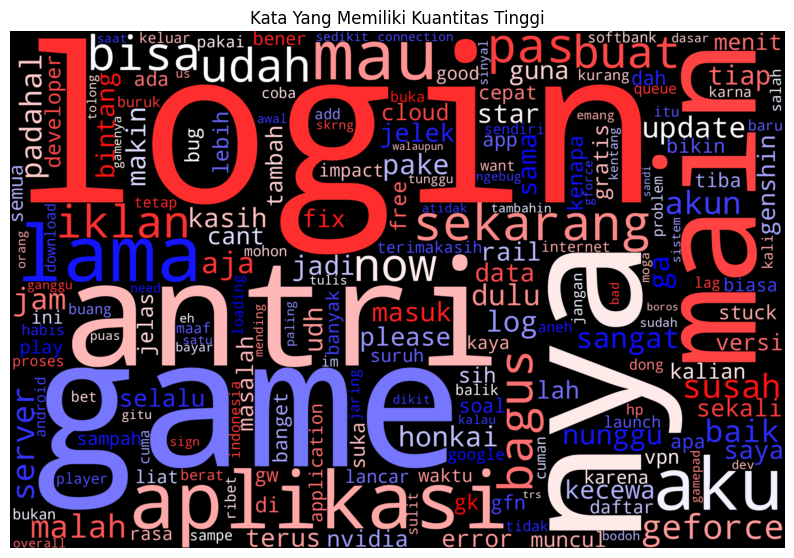

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


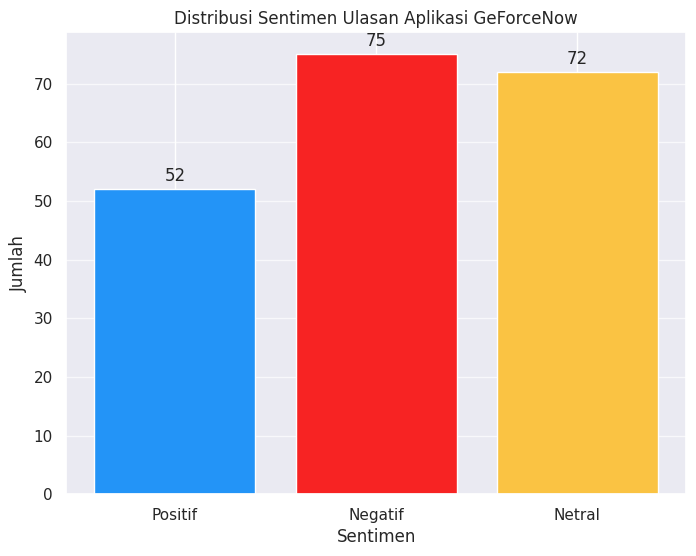

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GeForceNow")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,udah langgan gamenya beli jelek lah apa mendin...,"fontcolor="" # FFFF00""alreadysubscribethe game ...",Negatif
1,kecewa berat gratis,Disappointment. Free weight.,Negatif
2,mau antri disuru liat iklan dulu sayang iklan ...,Let's get in line. Let's see the ads first. Ho...,Positif
4,update nya jadi iklan begini biasa nunggu antr...,It's been an ad like this waiting for a long t...,Negatif
7,suruh daftar gamehub habis daftar suruh regis ...,Ask the gamehub list to run out. Get regis. I'...,Positif
...,...,...,...
189,minimal loading nya ga abad lah broo dulu gue ...,It's not a century. I used to play safe. Keep ...,Positif
190,sinyal aku udah bagus masih lag main nya aneh ...,My signal's good. Still playing. It's weird.,Positif
193,login susah,hard login,Negatif
195,very long queue more than hours just for hour ...,very long queue more than hours just for hour ...,Positif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,udah langgan gamenya beli jelek lah apa mendin...,"fontcolor="" # FFFF00""alreadysubscribethe game ...",0
1,kecewa berat gratis,Disappointment. Free weight.,0
2,mau antri disuru liat iklan dulu sayang iklan ...,Let's get in line. Let's see the ads first. Ho...,1
4,update nya jadi iklan begini biasa nunggu antr...,It's been an ad like this waiting for a long t...,0
7,suruh daftar gamehub habis daftar suruh regis ...,Ask the gamehub list to run out. Get regis. I'...,1
...,...,...,...
189,minimal loading nya ga abad lah broo dulu gue ...,It's not a century. I used to play safe. Keep ...,1
190,sinyal aku udah bagus masih lag main nya aneh ...,My signal's good. Still playing. It's weird.,1
193,login susah,hard login,0
195,very long queue more than hours just for hour ...,very long queue more than hours just for hour ...,1


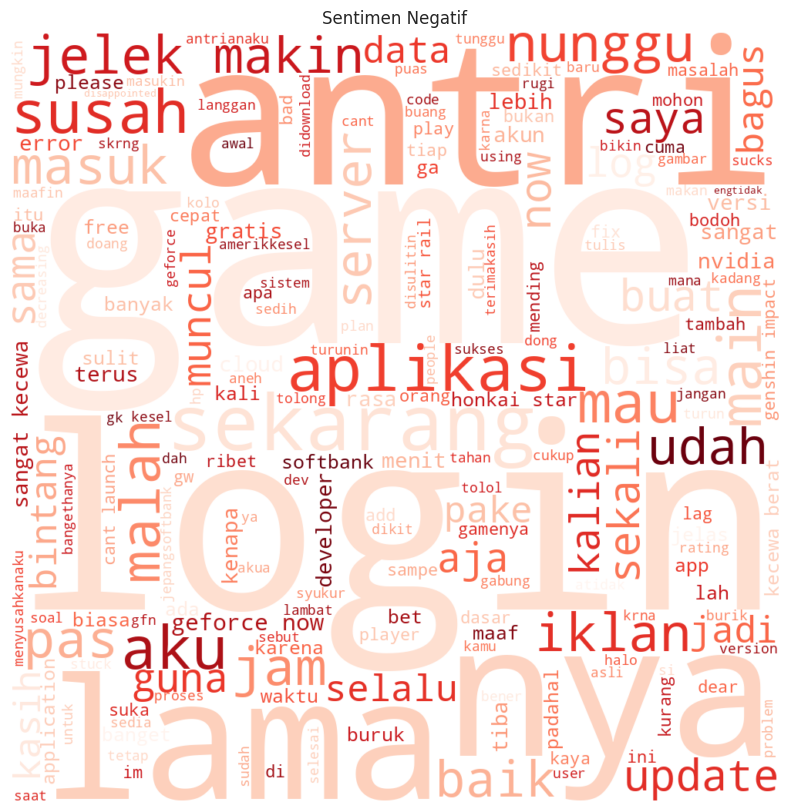

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

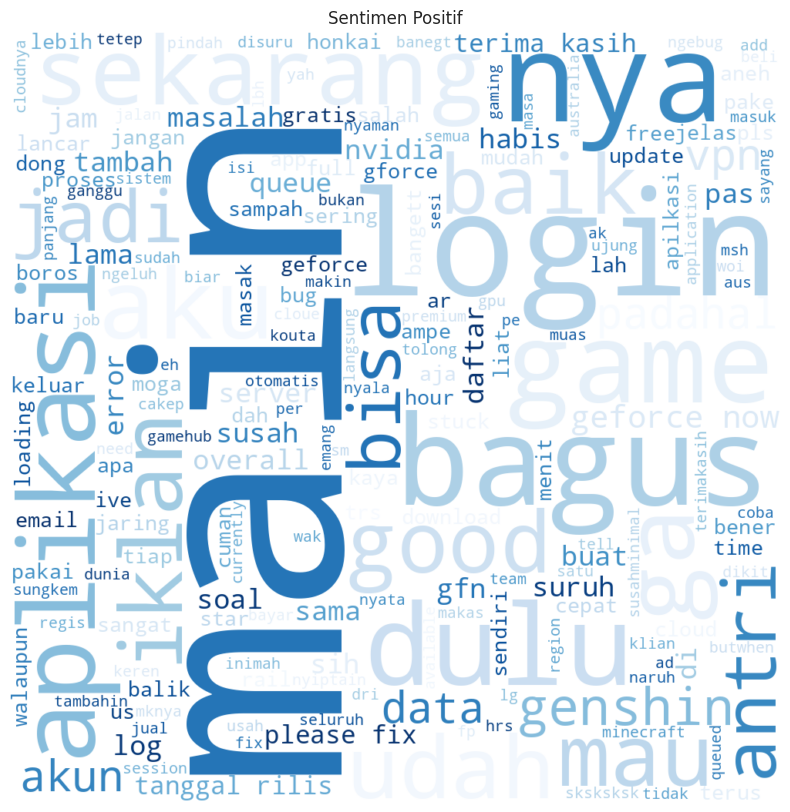

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
0    75
1    52
Name: count, dtype: int64

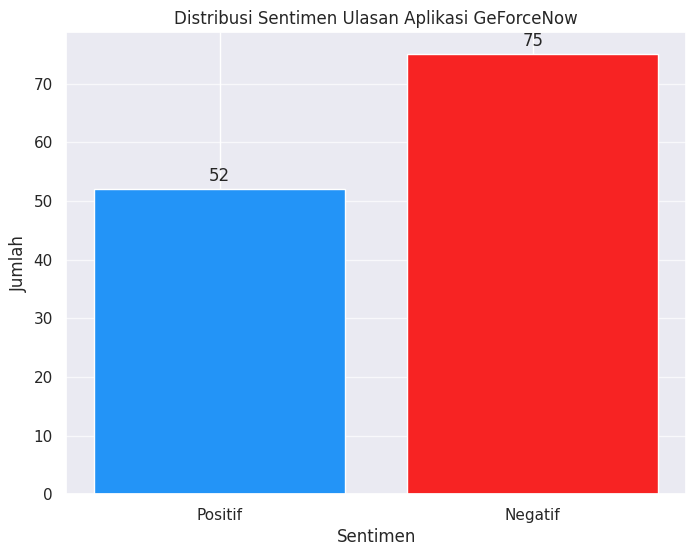

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi GeForceNow")

# **Data Preparation**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [46]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

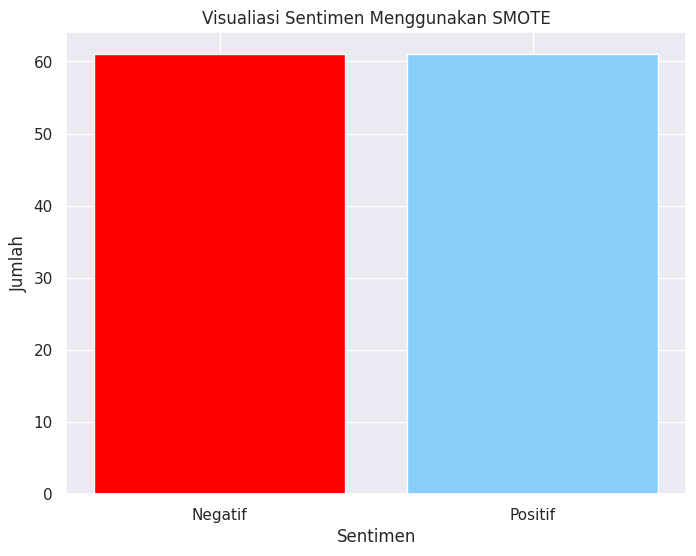

In [47]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [48]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [49]:
y_pred = naive_bayes.predict(X_test_vec)

In [50]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.46153846153846156

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.50      0.71      0.59        14
     Positif       0.33      0.17      0.22        12

    accuracy                           0.46        26
   macro avg       0.42      0.44      0.41        26
weighted avg       0.42      0.46      0.42        26



In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[10  4]
 [10  2]]

True Positives (TP) =  10

True Negatives (TN) =  2

False Positives (FP) =  4

False Negatives (FN) =  10

Accuracy =  0.46153846153846156


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

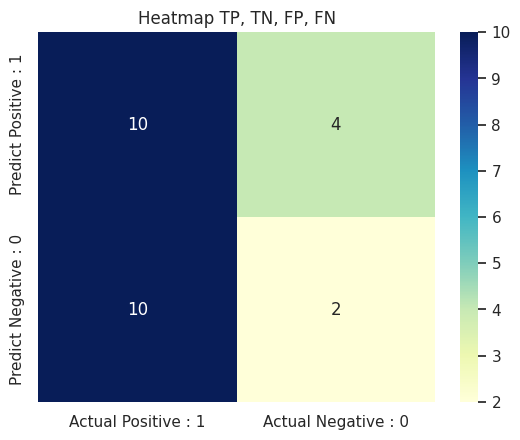

In [52]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [53]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [54]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.4615


In [55]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.5385


# **Testing**


In [56]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek, error terus
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [57]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus, bisa main game komputer tanpa pc
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


**Hasil Testing Kedua Menunjukkan bahwa Model tidak bisa memprediksi Ulasan dengan baik & benar.**